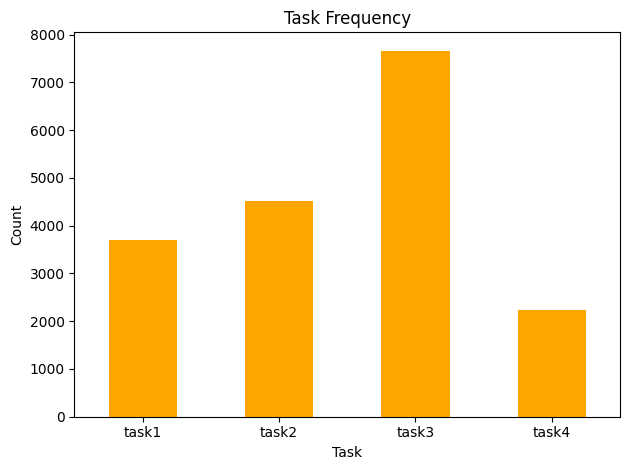

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load your CSV
df = pd.read_csv('structured_output.csv')  # Replace with your actual file path

# Extract task numbers using regex
df['task'] = df['file_id'].str.extract(r'(task\d+)')

# Count how many times each task appears
task_counts = df['task'].value_counts().sort_index()

# Plotting
task_counts.plot(kind='bar', color='orange')
plt.title('Task Frequency')
plt.xlabel('Task')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory with CSV files
directory = 'Transcriptions_qar'

# Lists to collect durations
duration_task1 = []
duration_task2 = []
duration_task3 = []
duration_task4 = []

# Go through each CSV in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        try:
            df = pd.read_csv(file_path)  # Assuming tab-separated
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue

        for _, row in df.iterrows():
            try:
                start = float(row['Beginning timestamp'])
                end = float(row['End timestamp'])
                duration = end - start
                if duration <= 1:
                    continue

                if row.get('task1') == 1:
                    duration_task1.append(duration)
                if row.get('task2') == 1:
                    duration_task2.append(duration)
                if row.get('task3') == 1:
                    duration_task3.append(duration)
                if row.get('task4') == 1:
                    duration_task4.append(duration)

            except Exception as e:
                print(f"Error processing row in {filename}: {e}")

# # Plot distributions
# plt.figure(figsize=(12, 8))

# for i, durations in enumerate([duration_task1, duration_task2, duration_task3, duration_task4], 1):
#     plt.subplot(2, 2, i)
#     plt.hist(durations, bins=30, density=True, alpha=0.7, color='skyblue')
#     plt.title(f'Duration Distribution - Task {i}')
#     plt.xlabel('Duration (seconds)')
#     plt.ylabel('Density')

# plt.tight_layout()
# plt.show()


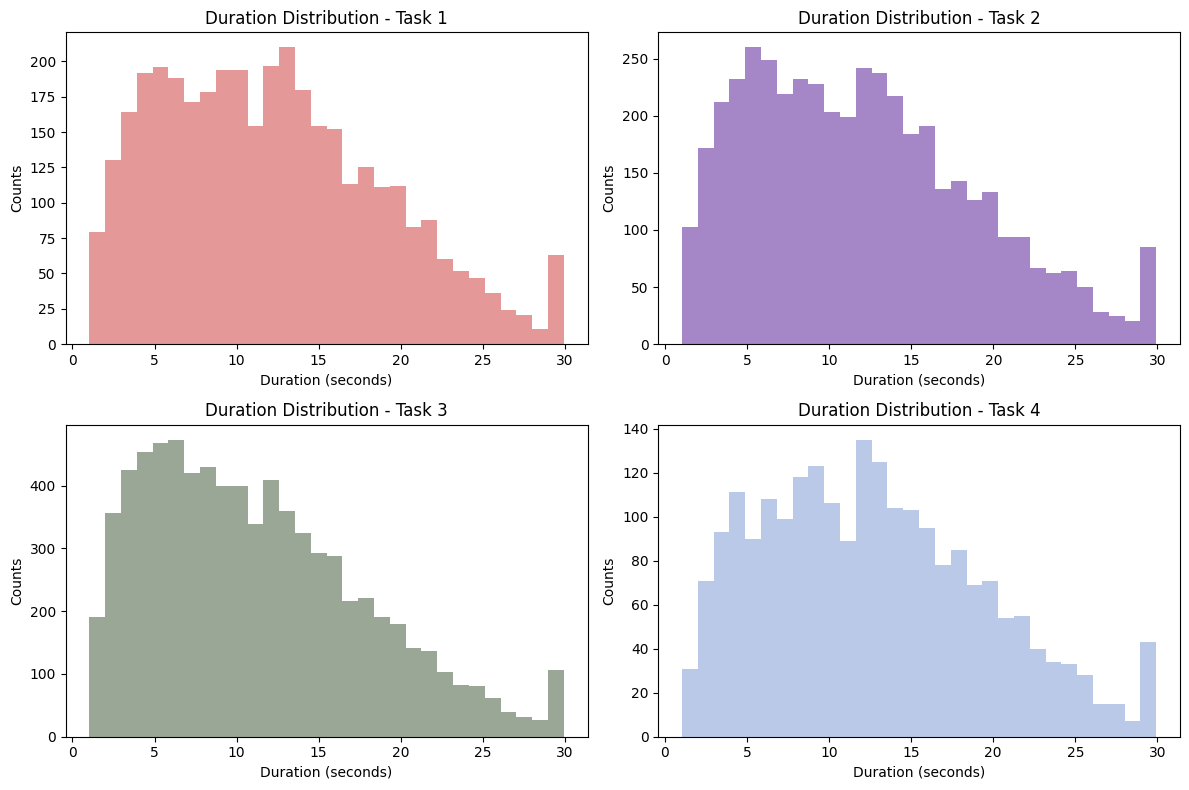

In [2]:
# Define distinct colors for each task
colors = ['#DA6C6C', '#7F55B1', '#6F826A', '#9FB3DF']

# Plot distributions
plt.figure(figsize=(12, 8))

for i, (durations, color) in enumerate(zip([duration_task1, duration_task2, duration_task3, duration_task4], colors), 1):
    plt.subplot(2, 2, i)
    plt.hist(durations, bins=30, density=False, alpha=0.7, color=color)
    plt.title(f'Duration Distribution - Task {i}')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Counts')

plt.tight_layout()
plt.show()